In [1]:
#import dependencies 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#read csv
df = pd.read_csv('Raw_Data/data_arrhythmia.csv',delimiter = ';')
df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,...,KY,KZ,LA,LB,LC,LD,LE,LF,LG,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0,-0.1,3.9,25.4,62.8,7


In [3]:
#Pull variables of interest
new_df = df[['age','sex','height','weight','qrs_duration','p-r_interval','q-t_interval','t_interval','p_interval','qrs','heart_rate','diagnosis']]
new_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8
1,56,1,165,64,81,174,401,149,39,25,53,6
2,54,0,172,95,138,163,386,185,102,96,75,10
3,55,0,175,94,100,202,380,179,143,28,71,1
4,75,0,190,80,88,181,360,177,103,-16,?,7


In [4]:
#Find any null variables
new_df.isnull().sum()

age             0
sex             0
height          0
weight          0
qrs_duration    0
p-r_interval    0
q-t_interval    0
t_interval      0
p_interval      0
qrs             0
heart_rate      0
diagnosis       0
dtype: int64

In [5]:
#Arrhythmia = 1
new_df['diagnosis'].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: diagnosis, dtype: int64

In [6]:
# number of heart arrhythmias not of interest
sum(df['diagnosis']!=1)

207

In [7]:
# Number of Arrhythmia of interest
sum(df['diagnosis']==1)

245

In [8]:
#Set arrhythmia of interest = 1
dummy_df = new_df.join(pd.get_dummies(new_df['diagnosis']==1))
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,False,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,1,0
1,56,1,165,64,81,174,401,149,39,25,53,6,1,0
2,54,0,172,95,138,163,386,185,102,96,75,10,1,0
3,55,0,175,94,100,202,380,179,143,28,71,1,0,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,1,0


In [9]:
#drop false column
dummy_df.drop(columns=[False],axis=1,inplace=True)
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,True
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [10]:
#Rename True column to Arrhythmia diagnosis
dummy_df.rename(columns={True:'arr_diagnosis'},inplace=True)

In [11]:
dummy_df.head()

,age,sex,height,weight,qrs_duration,p-r_interval,q-t_interval,t_interval,p_interval,qrs,heart_rate,diagnosis,arr_diagnosis
0,75,0,190,80,91,193,371,174,121,-16,63,8,0
1,56,1,165,64,81,174,401,149,39,25,53,6,0
2,54,0,172,95,138,163,386,185,102,96,75,10,0
3,55,0,175,94,100,202,380,179,143,28,71,1,1
4,75,0,190,80,88,181,360,177,103,-16,?,7,0


In [23]:
#heart_rate column had string '?', this will remove the string (updated: LL)
# replaced = dummy_df.replace(['?'],0)
dummy_df = dummy_df.loc[dummy_df['heart_rate'] !='?']

In [29]:
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 451
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            451 non-null    int64 
 1   sex            451 non-null    int64 
 2   height         451 non-null    int64 
 3   weight         451 non-null    int64 
 4   qrs_duration   451 non-null    int64 
 5   p-r_interval   451 non-null    int64 
 6   q-t_interval   451 non-null    int64 
 7   t_interval     451 non-null    int64 
 8   p_interval     451 non-null    int64 
 9   qrs            451 non-null    int64 
 10  heart_rate     451 non-null    object
 11  diagnosis      451 non-null    int64 
 12  arr_diagnosis  451 non-null    uint8 
dtypes: int64(11), object(1), uint8(1)
memory usage: 46.2+ KB


In [31]:
#change all columns to integer (Updated: LL)
replaced_df = dummy_df.astype(int)
replaced_df.dtypes

age              int64
sex              int64
height           int64
weight           int64
qrs_duration     int64
p-r_interval     int64
q-t_interval     int64
t_interval       int64
p_interval       int64
qrs              int64
heart_rate       int64
diagnosis        int64
arr_diagnosis    int64
dtype: object

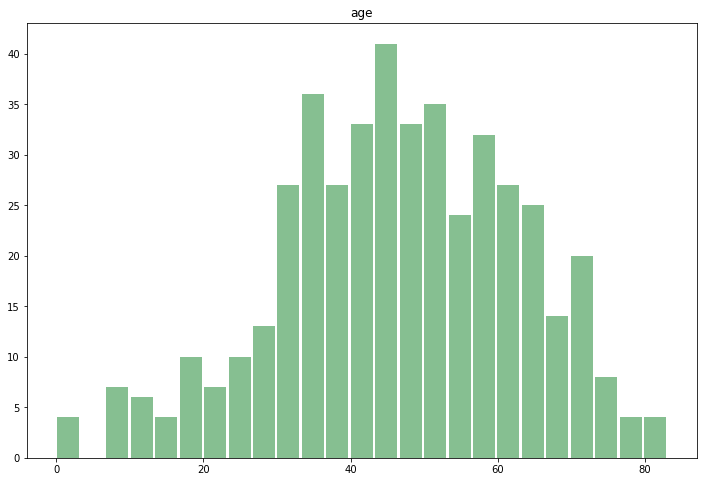

In [16]:
#Distribution of age
ax = replaced_df.hist(column='age', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

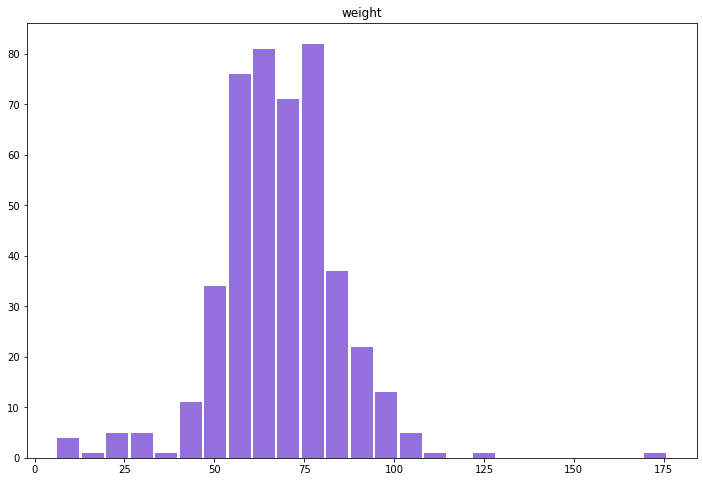

In [17]:
#Distribution of weight
ax = replaced_df.hist(column='weight', bins=25, grid=False, figsize=(12,8), color='mediumpurple', zorder=2, rwidth=0.9)

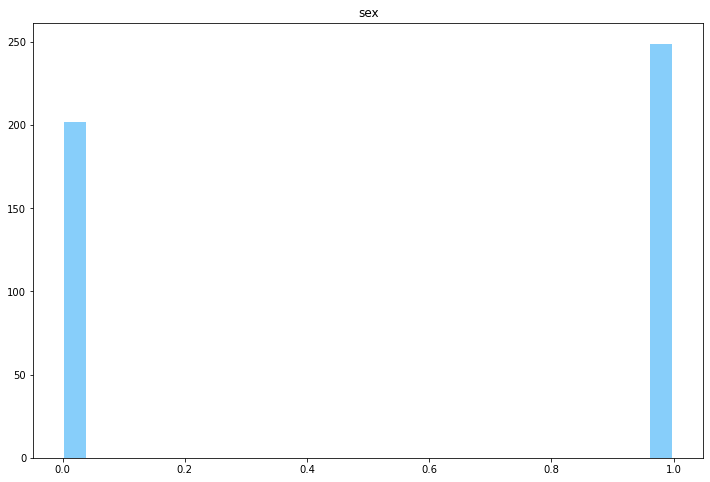

In [18]:
#Distribution of Sex
#Male = 0
#Female = 1
ax = replaced_df.hist(column='sex', bins=25, grid=False, figsize=(12,8), color='lightskyblue', zorder=2, rwidth=0.9)

In [19]:
#Distribution of heart rate
ax = replaced_df.hist(column='heart_rate', bins=25, grid=False, figsize=(12,8), color='palevioletred', zorder=2, rwidth=0.9)

ValueError: hist method requires numerical or datetime columns, nothing to plot.

In [ ]:
#Distribution of diagnosis of interest
ax = replaced_df.hist(column='arr_diagnosis', bins=25, grid=False, figsize=(12,8), color='lightpink', zorder=2, rwidth=0.9)

In [ ]:
import seaborn as sns

In [ ]:
sns.heatmap(replaced_df.corr())

In [ ]:
sns.distplot(replaced_df['age'])

In [ ]:
replaced_df.plot(kind="scatter", x="heart_rate", y="diagnosis", grid=True, figsize=(8,8),
              title="")
plt.show()

In [ ]:
replaced_df.plot(kind="scatter", x="age", y="diagnosis", grid=True, figsize=(8,8),
              title="")
plt.show()

In [ ]:
replaced_df.plot(kind="scatter", x="arr_diagnosis", y="age", grid=True, figsize=(8,8),
              title="")
plt.show()

In [ ]:
# Use Pandas to read data
clean_data = "clean_data.csv"
clean_data_df = pd.read_csv(clean_data)
clean_data_df.head()

In [ ]:
# Using GroupBy in order to separate the data into fields according to "sex" values
grouped_sex_df = clean_data_df.groupby(['sex'])
sex_presence = grouped_sex_df["arr_diagnosis"].sum()
# Creating a new DataFrame using presence
sex_summary_df = pd.DataFrame({"Number of Arrhythmias": sex_presence})
# Chart our data, give it a title, and label the axes
sex_chart = sex_summary_df.plot(kind="bar", title="Arrhythmias by Sex", color='mediumaquamarine')
sex_chart.set_xlabel("Sex")
sex_chart.set_ylabel("Presence of Arrhythmias")

plt.show()

In [ ]:
colors = ["mediumaquamarine", "cornflowerblue"]
# Create a pie chart based upon the arrhythmia presence for each sex
sex_pie = sex_summary_df.plot(kind="pie", y='Number of Arrhythmias', title=("Arrhythmias by Sex"), colors=colors, autopct="%1.1f%%")
sex_pie.set_ylabel("Presence of Arrhythmias")

plt.show()

In [ ]:
# Using GroupBy in order to separate the data into fields according to "age" values
grouped_age_df = clean_data_df.groupby(['age'])
age_presence = grouped_age_df["arr_diagnosis"].sum()
age_summary_df = pd.DataFrame({"Number of Arrhythmias": age_presence})
# Chart our data, give it a title, and label the axes
age_chart = age_summary_df.plot(kind="bar", title="Arrhythmias by Age", color='cornflowerblue', figsize=(20,15))
age_chart.set_xlabel("Age")
age_chart.set_ylabel("Presence of Arrhythmias")

plt.show()

In [ ]:
# Using GroupBy in order to separate the data into fields according to "heart rate" values
grouped_rate_df = clean_data_df.groupby(['heart_rate'])
rate_presence = grouped_rate_df["arr_diagnosis"].sum()
rate_summary_df = pd.DataFrame({"Number of Arrhythmias": rate_presence})
# Chart our data, give it a title, and label the axes
rate_chart = rate_summary_df.plot(kind="bar", title="Arrhythmias by Heart Rate", color='lightcoral', figsize=(20,15))
rate_chart.set_xlabel("Heart Rate")
rate_chart.set_ylabel("Presence of Arrhythmias")

plt.show()

In [ ]:
# Using GroupBy in order to separate the data into fields according to "height" values
grouped_height_df = clean_data_df.groupby(['height'])
height_presence = grouped_height_df["arr_diagnosis"].sum()
height_summary_df = pd.DataFrame({"Number of Arrhythmias": height_presence})
# Chart our data, give it a title, and label the axes
height_chart = height_summary_df.plot(kind="bar", title="Arrhythmias by Height", color='lightpink', figsize=(20,15))
height_chart.set_xlabel("Height")
height_chart.set_ylabel("Presence of Arrhythmias")

plt.show()

In [ ]:
# Using GroupBy in order to separate the data into fields according to "height" values
grouped_weight_df = clean_data_df.groupby(['weight'])
weight_presence = grouped_weight_df["arr_diagnosis"].sum()
weight_summary_df = pd.DataFrame({"Number of Arrhythmias": weight_presence})
# Chart our data, give it a title, and label the axes
weight_chart = height_summary_df.plot(kind="bar", title="Arrhythmias by Weight", color='mediumslateblue', figsize=(20,15))
weight_chart.set_xlabel("Weight")
weight_chart.set_ylabel("Presence of Arrhythmias")

plt.show()